# Titanic Passenger Survival Analysis

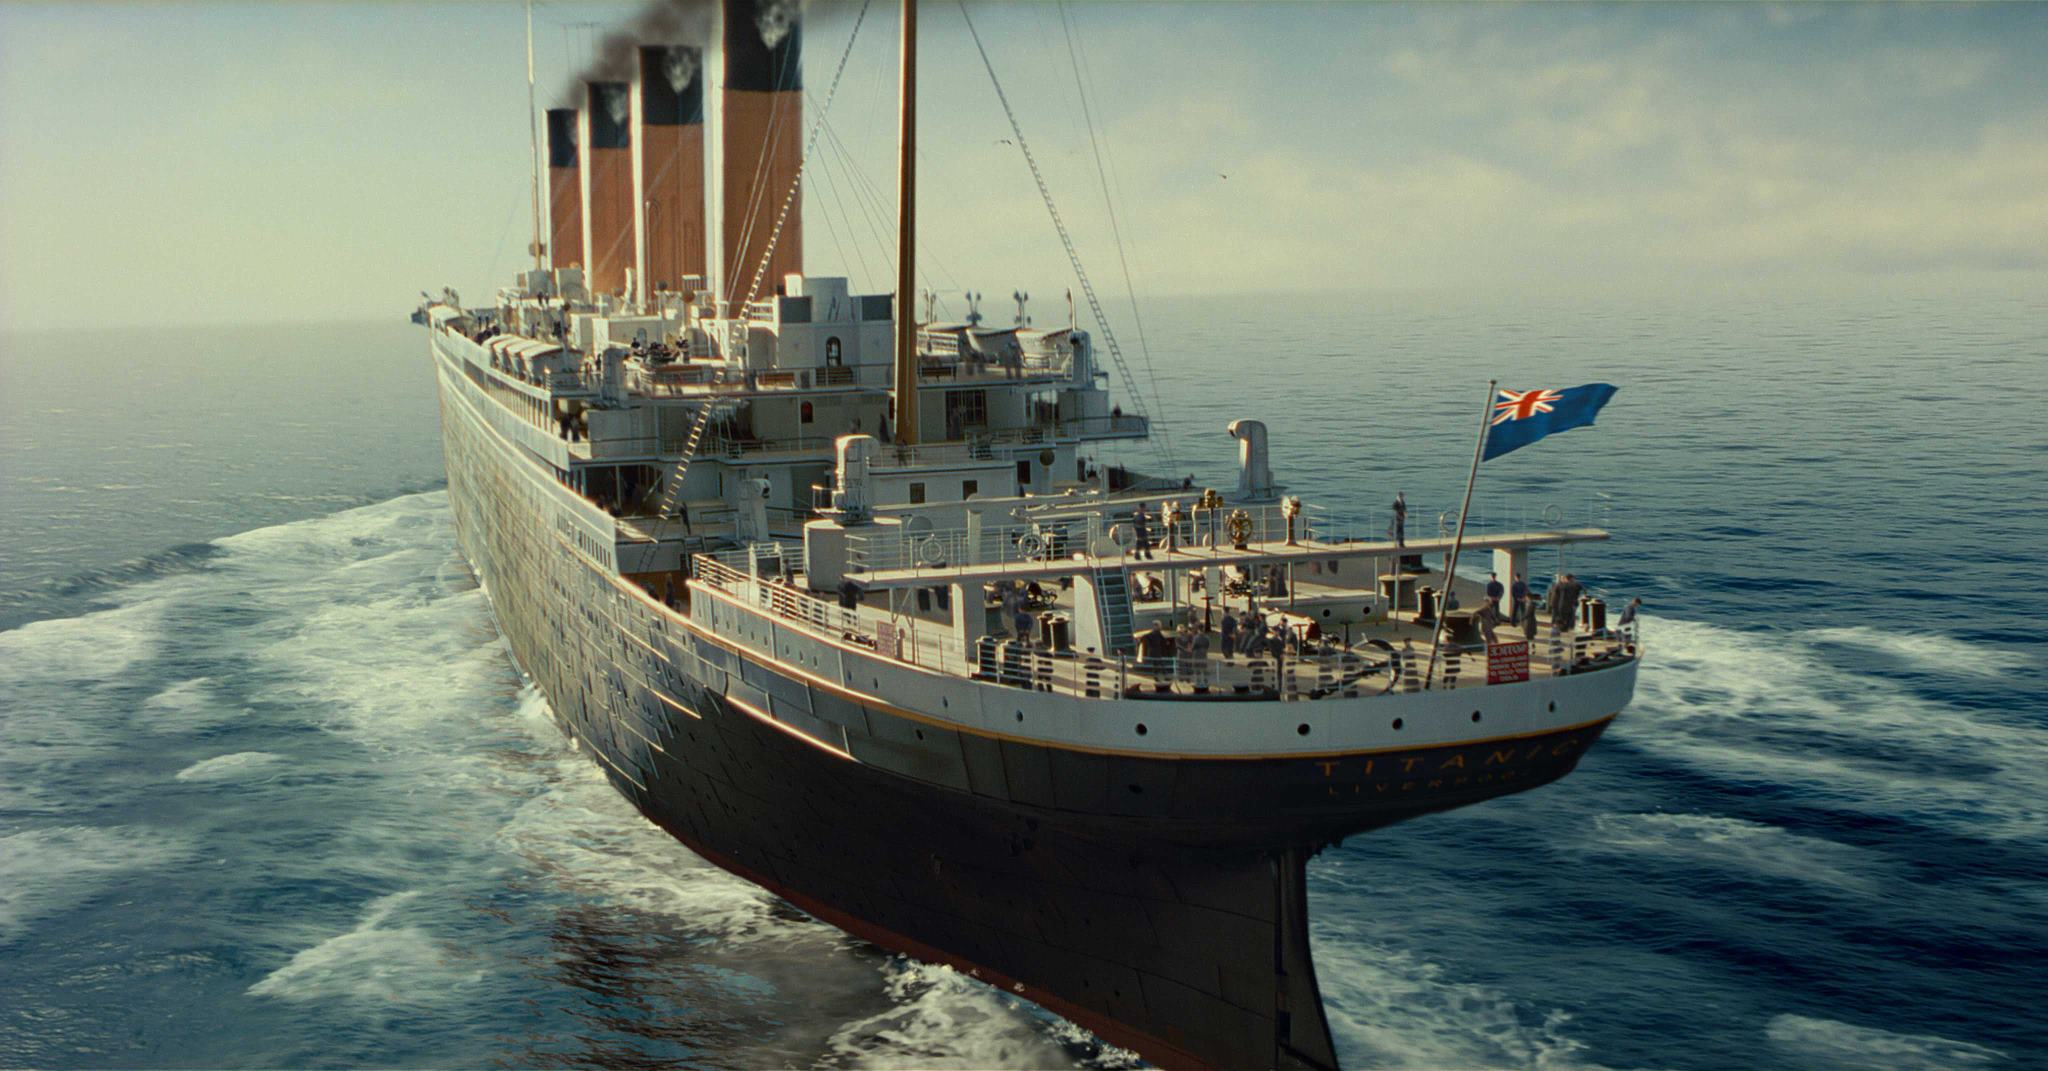

In [1]:
from IPython.display import Image
Image("titanic1.jpg")

### 1. Some Useful Packages

In [2]:
# basic libraries
import sys
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
sys.version

'3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]'

In [4]:
# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.style.use('seaborn-notebook')

### 2. Read Data & Quick Overview

In [5]:
# import training & testing data
df_train = pd.read_csv("titanic_train.csv")
df_test = pd.read_csv("test.csv") # test data is downloaded from Kaggle

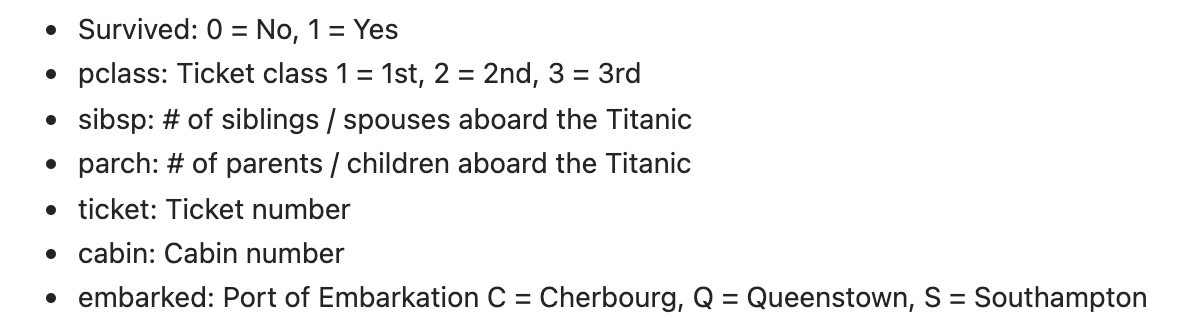

In [6]:
Image("data explanation.png")

In [7]:
# see columns, rows, null, data type, etc.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# first 5 rows
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [10]:
# data distribution
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### 3. Data Cleaning & Engineering (For Human Readability)

In [11]:
for df in df_train, df_test:
    
    # 1.Lower columns for convenience
    df.columns = df.columns.str.lower()
    
    # 2.Creat new features(familysize, single) based on sibsp & parch columns to condense similar information
    df["familysize"] = df['sibsp'] + df["parch"] + 1
    df.drop(["sibsp","parch"], axis=1, inplace = True)
    df["single"] = 1
    df["single"].loc[df["familysize"] > 1] = 0
    
    # 3. Extract title from names for clearer & more useful information
    df["title"] = df['name'].str.split(", ", expand=True)[1].str.split('.', expand=True)[0]
    df.drop(['name'], axis = 1, inplace = True)
    
    # 4. Fill null values for embarked(mode) & fare(median)
    df['embarked'].fillna("S", inplace=True)
    df['fare'].fillna(df['fare'].median(), inplace=True)
    
    # 5. Drop useless columns. Keep passengerid column for test data for kaggle submission
    if "survived" in df.columns:
        df.drop(["passengerid","ticket","cabin"], axis=1, inplace=True)
    else:
        df.drop(["ticket","cabin"], axis=1, inplace=True)
        
df_train

survived  pclass     sex   age     fare embarked  familysize  single  \
0           0       3    male  22.0   7.2500        S           2       0   
1           1       1  female  38.0  71.2833        C           2       0   
2           1       3  female  26.0   7.9250        S           1       1   
3           1       1  female  35.0  53.1000        S           2       0   
4           0       3    male  35.0   8.0500        S           1       1   
..        ...     ...     ...   ...      ...      ...         ...     ...   
886         0       2    male  27.0  13.0000        S           1       1   
887         1       1  female  19.0  30.0000        S           1       1   
888         0       3  female   NaN  23.4500        S           4       0   
889         1       1    male  26.0  30.0000        C           1       1   
890         0       3    male  32.0   7.7500        Q           1       1   

    title  
0      Mr  
1     Mrs  
2    Miss  
3     Mrs  
4      Mr  
..    ...  
886   Rev  
887  Miss  
888  Miss  
889    Mr  
890    Mr  

[891 rows x 9 columns]

In [12]:
df_test["title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: title, dtype: int64

In [13]:
df_train["title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [14]:
# Simplify titles
for df in df_train, df_test:
    title_names = df['title'].value_counts() < 20
    df['title'] = df['title'].apply(lambda x: "Other" if title_names[x] else x)
    
    # fill null values in age based on title age median to be more accurate
    df["age"].fillna(df.groupby("title")["age"].transform("median"), inplace= True)

### 3. Data Visualizstion

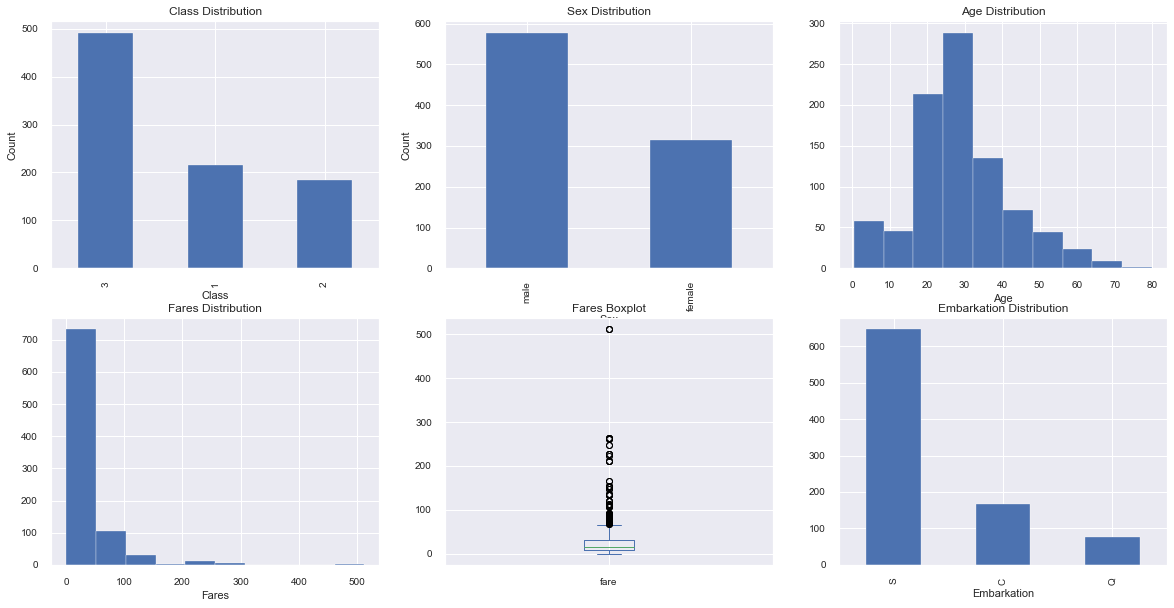

In [15]:
# Visualize data distribution for each feature

fig = plt.figure(figsize=(20,10))

# pclass
plt.subplot2grid((2, 3), (0, 0))
df_train['pclass'].value_counts().plot(kind='bar')
plt.ylabel(u"Count")
plt.xlabel(u'Class')
plt.title(u'Class Distribution')

# sex
plt.subplot2grid((2, 3), (0, 1))
df_train['sex'].value_counts().plot(kind='bar')
plt.ylabel(u"Count")
plt.xlabel(u'Sex')
plt.title(u'Sex Distribution')

# age
plt.subplot2grid((2, 3), (0, 2))
df_train['age'].hist()
plt.xlabel(u'Age')
plt.title(u'Age Distribution')

# fare histogram
plt.subplot2grid((2, 3), (1, 0))
df_train['fare'].hist()
plt.xlabel(u'Fares')
plt.title(u'Fares Distribution')

# fare boxplot
plt.subplot2grid((2, 3), (1, 1))
df_train['fare'].plot(kind='box')
plt.title(u'Fares Boxplot')

# embarkation
plt.subplot2grid((2, 3), (1, 2))
df_train['embarked'].value_counts().plot(kind='bar')
plt.xlabel(u'Embarkation')
plt.title(u'Embarkation Distribution')
plt.show()

In [16]:
# show feature distrubution by dead/survive
def bar_chart(feature):
    survived = df_train[df_train['survived']==1][feature].value_counts()
    dead = df_train[df_train['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

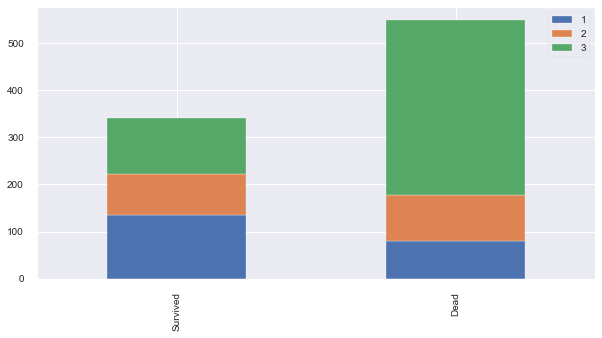

In [17]:
bar_chart('pclass')

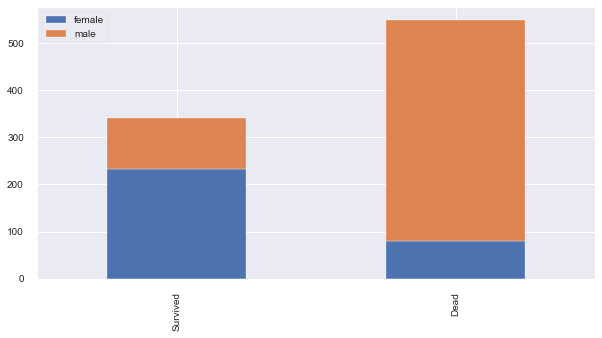

In [18]:
bar_chart('sex')

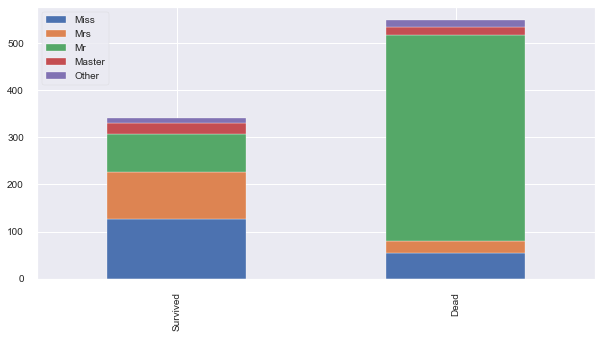

In [19]:
bar_chart('title')

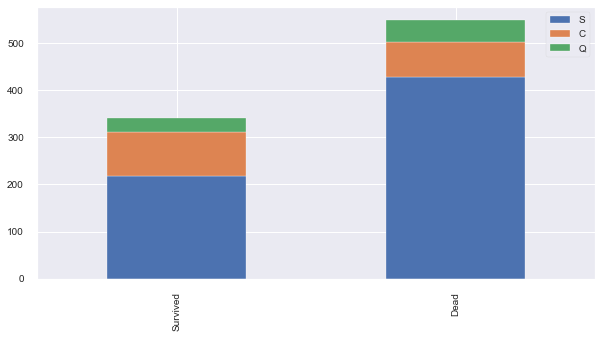

In [20]:
bar_chart('embarked')

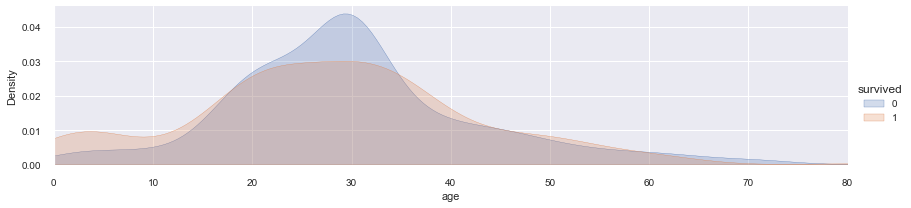

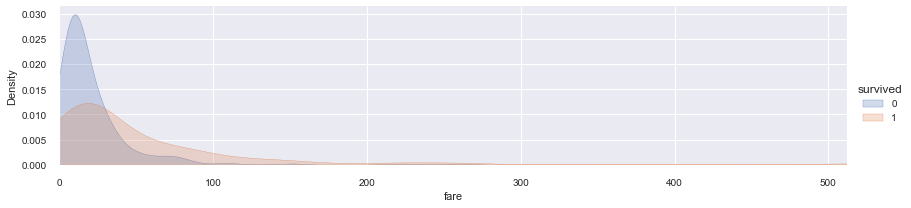

In [21]:
# show feature distrubution by dead/survive

# age distribution
facet = sns.FacetGrid(df_train, hue="survived",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df_train['age'].max()))
facet.add_legend() 
plt.show()

# fare distribution
facet = sns.FacetGrid(df_train, hue="survived",aspect=4)
facet.map(sns.kdeplot,'fare',shade= True)
facet.set(xlim=(0, df_train['fare'].max()))
facet.add_legend() 
plt.show()

### 4. Data Cleaning & Engineering (For Machine Readability)

In [22]:
import sklearn

In [23]:
# import package to encode categorical data for model training
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [24]:
# import package to standardize numeric data to eliminate numeric effect
from sklearn.preprocessing import StandardScaler
transfer=StandardScaler()

In [25]:
df_train

survived  pclass     sex   age     fare embarked  familysize  single  \
0           0       3    male  22.0   7.2500        S           2       0   
1           1       1  female  38.0  71.2833        C           2       0   
2           1       3  female  26.0   7.9250        S           1       1   
3           1       1  female  35.0  53.1000        S           2       0   
4           0       3    male  35.0   8.0500        S           1       1   
..        ...     ...     ...   ...      ...      ...         ...     ...   
886         0       2    male  27.0  13.0000        S           1       1   
887         1       1  female  19.0  30.0000        S           1       1   
888         0       3  female  21.0  23.4500        S           4       0   
889         1       1    male  26.0  30.0000        C           1       1   
890         0       3    male  32.0   7.7500        Q           1       1   

     title  
0       Mr  
1      Mrs  
2     Miss  
3      Mrs  
4       Mr  
..     ...  
886  Other  
887   Miss  
888   Miss  
889     Mr  
890     Mr  

[891 rows x 9 columns]

In [26]:
df_test

passengerid  pclass     sex   age      fare embarked  familysize  single  \
0            892       3    male  34.5    7.8292        Q           1       1   
1            893       3  female  47.0    7.0000        S           2       0   
2            894       2    male  62.0    9.6875        Q           1       1   
3            895       3    male  27.0    8.6625        S           1       1   
4            896       3  female  22.0   12.2875        S           3       0   
..           ...     ...     ...   ...       ...      ...         ...     ...   
413         1305       3    male  28.5    8.0500        S           1       1   
414         1306       1  female  39.0  108.9000        C           1       1   
415         1307       3    male  38.5    7.2500        S           1       1   
416         1308       3    male  28.5    8.0500        S           1       1   
417         1309       3    male   7.0   22.3583        C           3       0   

      title  
0        Mr  
1       Mrs  
2        Mr  
3        Mr  
4       Mrs  
..      ...  
413      Mr  
414   Other  
415      Mr  
416      Mr  
417  Master  

[418 rows x 9 columns]

In [27]:
# encode categorical data & standardize numeric data
for df in df_train, df_test:
    for cat_feat in ["sex","embarked","title"]:
        df[cat_feat] = label.fit_transform(df[cat_feat])

    df.iloc[:,1:] = transfer.fit_transform(df.iloc[:,1:])

In [28]:
from sklearn import svm,naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train.iloc[:,1:], df_train.iloc[:,0], stratify= df_train.iloc[:,0], test_size=0.2, random_state=12)

In [30]:
def model_selection(df):
    
    Algorithm = []
    Accuracy = []
    Time = []
    
    x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], stratify= df.iloc[:,0], test_size=0.2, random_state=42)
    
    # try logistics regression 
    Algorithm.append('Logistic Regression')
    
    start_time = datetime.datetime.now()
    
    logi = LogisticRegression()
    logi.fit(x_train, y_train)
    
    logi_accuracy = f"{np.round(100*logi.score(x_test, y_test),2)}%"
    Accuracy.append(logi_accuracy)
    
    end_time = datetime.datetime.now()
    lg_cal_time = (end_time-start_time).seconds
    Time.append(lg_cal_time)

    # try SVM   
    Algorithm.append('SVM')
    
    start_time = datetime.datetime.now()
    
    Svm = svm.SVC()
    Svm.fit(x_train, y_train)
    
    svm_accuracy = f"{np.round(100*Svm.score(x_test, y_test),2)}%"
    Accuracy.append(svm_accuracy)
    
    end_time = datetime.datetime.now()
    svm_cal_time = (end_time-start_time).seconds
    Time.append(svm_cal_time)

    # try Random Forest
    Algorithm.append('Random Forest')
    
    start_time = datetime.datetime.now()
    
    bagging = RandomForestClassifier()
    bagging.fit(x_train, y_train)
    
    bagging_accuracy = f"{np.round(100*bagging.score(x_test, y_test),2)}%"
    Accuracy.append(bagging_accuracy)
    
    end_time = datetime.datetime.now()
    bagging_cal_time = (end_time-start_time).seconds
    Time.append(bagging_cal_time)
    
    # show test result
    test_result = pd.DataFrame({"Algorithm":Algorithm,"Time(Seconds)": Time,"Accuracy":Accuracy})
    
    return(test_result)

In [31]:
model_selection(df_train)

Algorithm  Time(Seconds) Accuracy
0  Logistic Regression              0   79.89%
1                  SVM              0   82.68%
2        Random Forest              0   79.89%

In [32]:
forest_clf= RandomForestClassifier(random_state=42)

In [33]:
forest_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
forest_clf.score(x_test, y_test)

0.8156424581005587

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Testing set


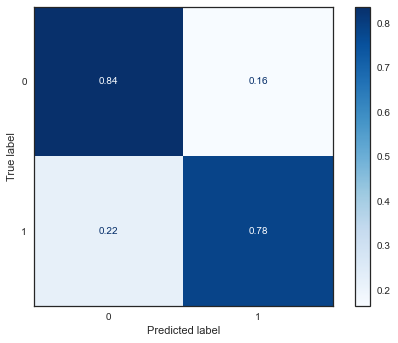

In [36]:
print('Testing set')
plt.style.use('seaborn-white')
confusion_matrix = plot_confusion_matrix(forest_clf, x_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [80]:
def cm_analysis(y_true, y_pred, labels, algorithm, figsize=(10,8)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = algorithm + ' Actual'
    cm.columns.name = algorithm + ' Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap = 'OrRd')

In [76]:
y_true = list(y_test)
y_pred = list(forest_clf.predict(x_test))
y_pred

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0]

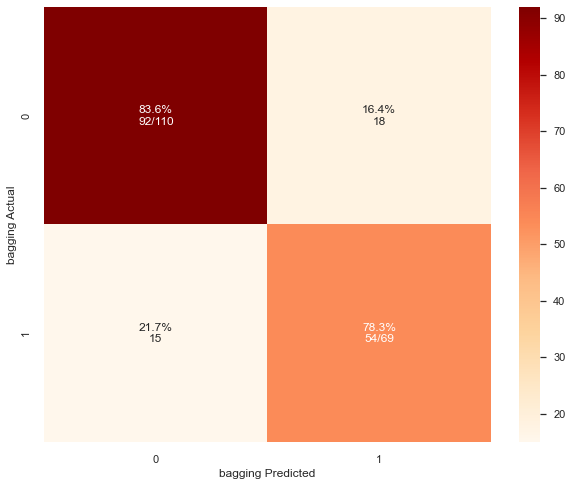

In [81]:
cm_analysis(y_true,y_pre,[0,1],"bagging") 

In [37]:
print(classification_report(y_test, forest_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       110
           1       0.75      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [38]:
# use the whole training data to train the model
all_x_train = df_train.iloc[:,1:]
all_y_train = df_train.iloc[:,0]

In [39]:
forest_clf_2 = RandomForestClassifier(random_state=42)

In [40]:
forest_clf_2.fit(all_x_train, all_y_train)

RandomForestClassifier(random_state=42)

In [41]:
# find feature importance
feature_importances = forest_clf_2.feature_importances_
features_df = pd.DataFrame({'Features':df_train.iloc[:,1:].columns,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)

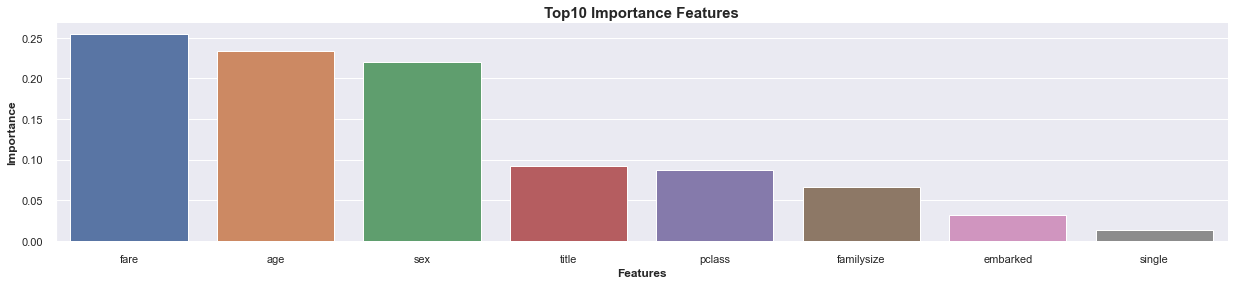

In [90]:
# visualize feature importance
sns.set(rc={"figure.figsize": (21, 4)})
sns.barplot(features_df['Features'][:10], features_df['Importance'][:10],)
plt.ylabel('Importance', weight="bold")
plt.xlabel('Features', weight="bold")
plt.title("Top10 Importance Features", fontsize=15, weight="bold")
sns.despine(bottom=True)
plt.show()

In [43]:
# model prediction
prediction_rf = forest_clf_2.predict(df_test.iloc[:,1:])
prediction_rf

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
passengerid = df_test.iloc[:,0]
passengerid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: passengerid, Length: 418, dtype: int64

In [45]:
# concat fot kaggle submission
submission_rf = {"PassengerId": list(passengerid), "Survived": list(prediction_rf)}
submission_rf = pd.DataFrame(submission_rf)
submission_rf

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [46]:
#submission_rf.to_csv("Kaggle_Titanic_Submission_Random_Forest.csv")

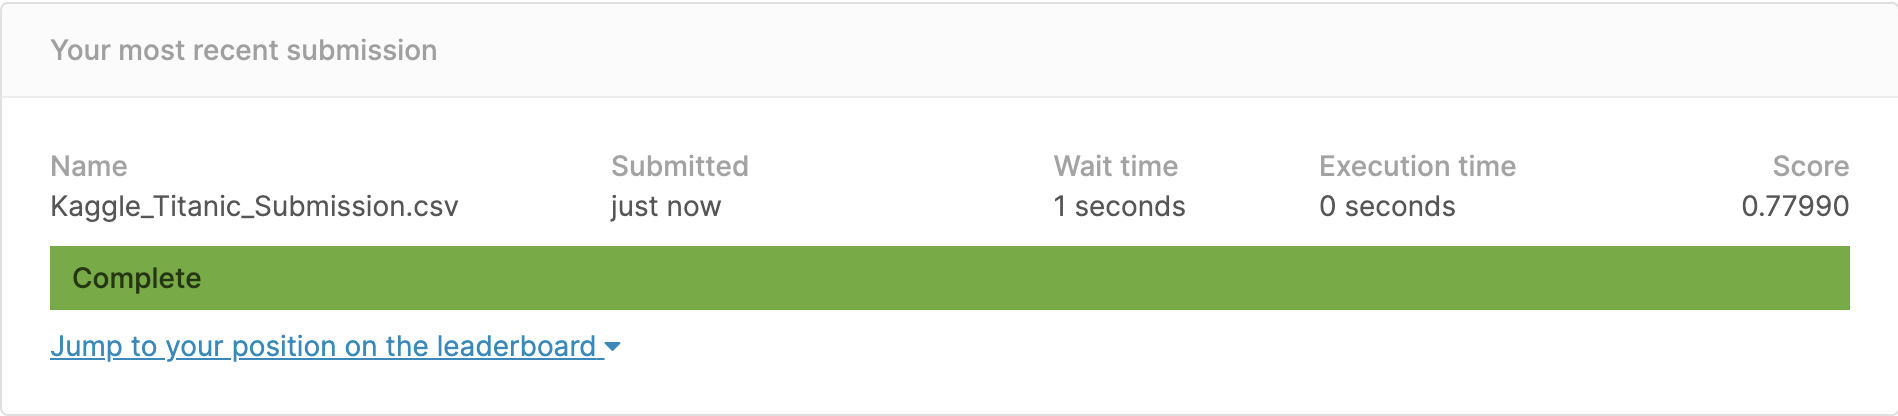

In [47]:
Image("Kaggle Score Random Forest.png")

In [48]:
# Try SVM
Svm = svm.SVC()
Svm.fit(x_train, y_train)

SVC()

In [49]:
Svm.score(x_test, y_test)

0.8212290502793296

In [50]:
Svm_2 = svm.SVC()
Svm_2.fit(all_x_train, all_y_train)

SVC()

In [51]:
prediction_svm = forest_clf_2.predict(df_test.iloc[:,1:])
prediction_svm

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
submission_svm = {"PassengerId": list(passengerid), "Survived": list(prediction_svm)}
submission_svm = pd.DataFrame(submission_svm)
submission_svm

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [53]:
#submission_svm.to_csv("Kaggle_Titanic_Submission_SVM.csv")

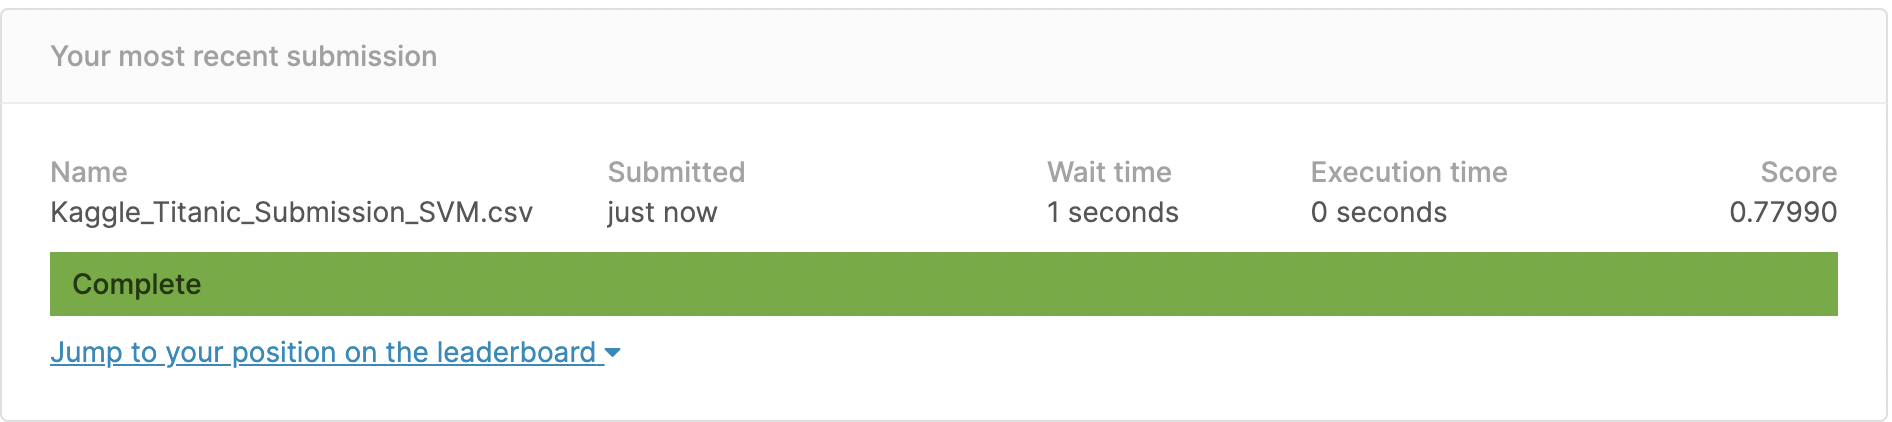

In [54]:
Image("Kaggle Score SVM.png") # no improvement

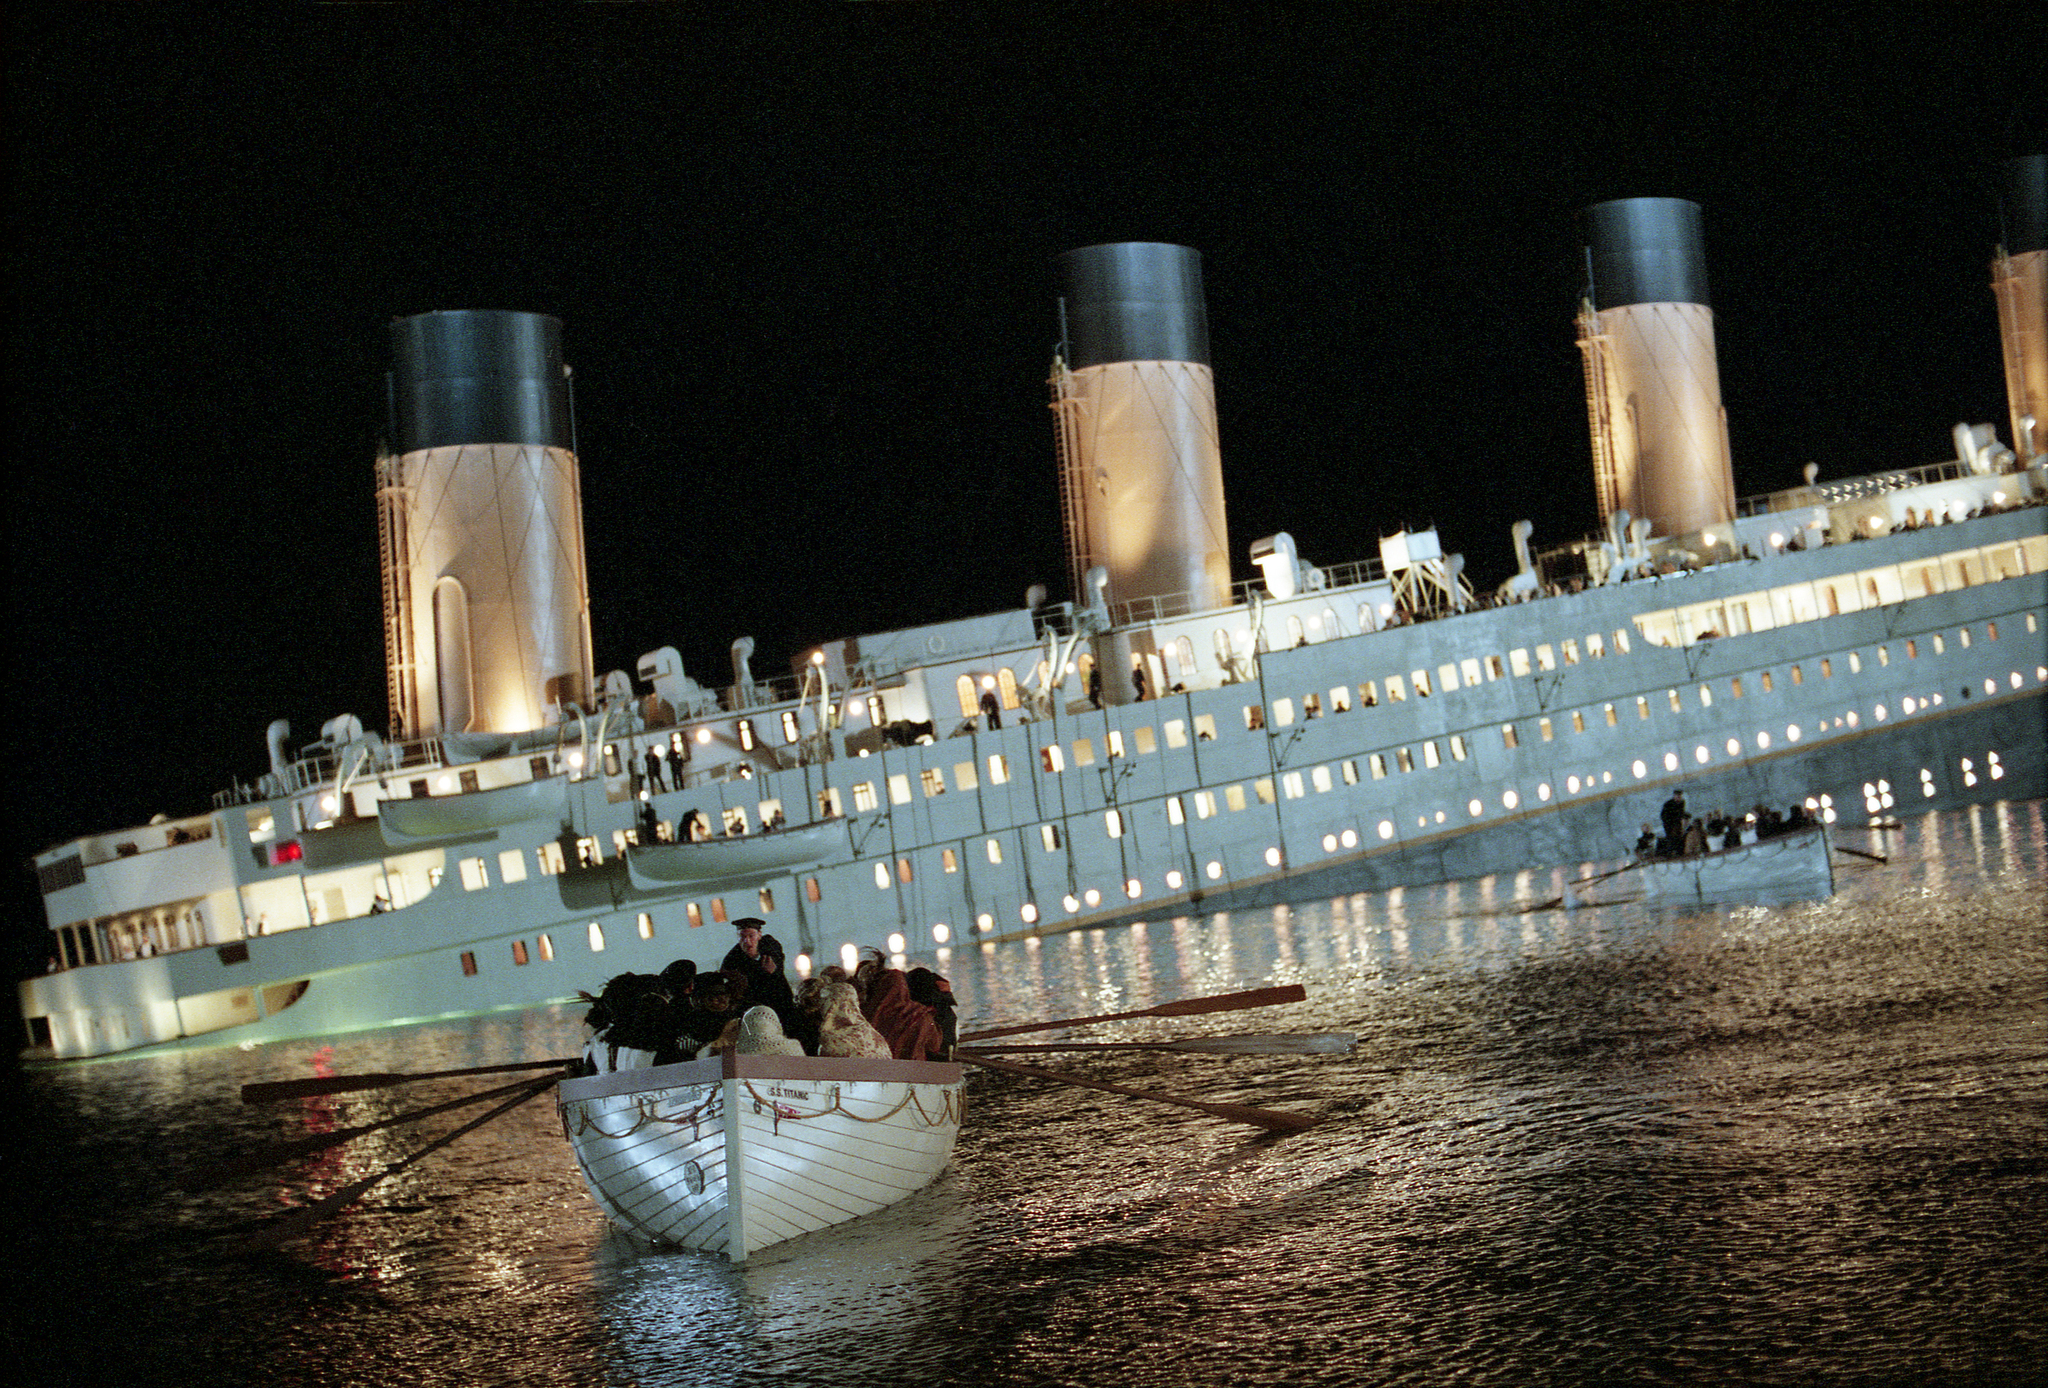

In [55]:
Image("titanic2.jpg")